In [180]:
import pandas as pd

In [181]:
qvals = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/lead_caQTL_variants.tsv.gz", sep="\t", header=0)
qvals["chr"] = "chr"+qvals["Chr"].astype(str) 
qvals = qvals[~qvals['Alt'].str.contains('<CN')]
qvals = qvals[~qvals['Alt'].str.contains(',')]
qvals = qvals[qvals['Alt'].str.len()==1]
qvals = qvals[qvals['Ref'].str.len()==1]
qvals = qvals.reset_index()
qvals['abs_Beta'] = abs(qvals['Beta'])

In [182]:
qvals.head()

,index,Peak,Chr,Pos,RsID,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF,chr,abs_Beta
0,2,3,1,875770,rs4970379,A,G,0.62500,2,0.044994,0.155446,0.057836,-0.232537,chr1,0.155446
1,4,5,1,930533,rs3128110,C,G,0.35435,0,0.099392,0.174020,0.040562,1.751829,chr1,0.174020
2,6,7,1,565286,rs1578391,C,T,0.59780,1,0.998561,0.886884,0.188153,3.085214,chr1,0.886884
3,7,8,1,569204,rs112660509,T,C,0.40125,1,0.477613,0.251458,0.140264,-0.671608,chr1,0.251458
4,9,10,1,748141,rs2427893,G,A,0.05005,0,0.988758,0.347965,0.059578,4.597219,chr1,0.347965


In [227]:
inside_other_peaks = qvals[(qvals["Inside_Peak"]==2) & (qvals["Log10_BF"]>3)].drop_duplicates()

In [228]:
inside_focal_peaks = qvals[(qvals["Inside_Peak"]==1) & (qvals["Log10_BF"]>3)].drop_duplicates()

In [229]:
inside_other_peaks.shape

(1742, 15)

In [230]:
inside_focal_peaks.shape

(9851, 15)

In [231]:
inside_focal_peaks.head(1)

,index,Peak,Chr,Pos,RsID,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF,chr,abs_Beta
2,6,7,1,565286,rs1578391,C,T,0.5978,1,0.998561,0.886884,0.188153,3.085214,chr1,0.886884


In [232]:
inside_other_peaks["Chr"]="chr"+inside_other_peaks["Chr"].astype(str)
inside_focal_peaks["Chr"]="chr"+inside_focal_peaks["Chr"].astype(str)

inside_focal_peaks["rsid"]=inside_focal_peaks["Chr"].astype(str)+"_"+inside_focal_peaks["Pos"].astype(str)+"_"+inside_focal_peaks["Ref"]+"_"+inside_focal_peaks["Alt"]
inside_other_peaks["rsid"]=inside_other_peaks["Chr"].astype(str)+"_"+inside_other_peaks["Pos"].astype(str)+"_"+inside_other_peaks["Ref"]+"_"+inside_other_peaks["Alt"]



In [233]:
len(set(inside_other_peaks["rsid"]))

973

In [234]:
len(set(inside_focal_peaks["rsid"]))

9851

In [235]:
z1 = set(inside_focal_peaks["RsID"]).intersection(set(inside_other_peaks["RsID"]))


In [236]:
len(z1)

656

In [237]:
z = set(inside_focal_peaks["rsid"]).intersection(set(inside_other_peaks["rsid"]))


In [238]:
len(z)

656

In [239]:
inside_other_peaks[inside_other_peaks.isin(z)].groupby('rsid')['Peak'].size().sort_values()

rsid
chr7_7860667_A_G       1
chr2_42826919_T_G      1
chr2_42357292_G_A      1
chr2_39955465_C_T      1
chr2_38079108_C_T      1
                      ..
chr1_181399618_G_T    11
chr12_87705214_G_A    14
chr10_20236731_A_G    18
chr13_75874528_T_C    34
chr3_192616700_T_G    47
Name: Peak, Length: 656, dtype: int64

In [240]:

newd = inside_other_peaks.sort_values('abs_Beta', ascending=False).drop_duplicates(['rsid'])



In [241]:
newd

,index,Peak,Chr,Pos,RsID,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF,chr,abs_Beta,rsid
77620,102420,97027,chr4,190156646,rs34706863,G,T,0.2650,2,0.998763,1.972464,0.092728,35.001132,chr4,1.972464,chr4_190156646_G_T
205567,269843,251337,chr17,19091555,rs200234160,T,A,0.0617,2,0.130740,-1.725211,0.137092,18.966584,chr17,1.725211,chr17_19091555_T_A
26827,35422,33009,chr2,114413955,rs12621065,T,C,0.5250,2,0.755553,-1.699921,0.147025,16.850797,chr2,1.699921,chr2_114413955_T_C
142292,186629,176374,chr9,31153406,rs10758026,T,C,0.4050,2,0.213319,1.443859,0.079542,29.586316,chr9,1.443859,chr9_31153406_T_C
62801,82724,77907,chr4,52727094,rs1875921,T,C,0.3350,2,0.210748,1.443545,0.105982,21.001514,chr4,1.443545,chr4_52727094_T_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126971,167010,157822,chr8,11718528,rs1293288,T,C,0.5700,2,0.992249,-0.072896,0.013616,3.066369,chr8,0.072896,chr8_11718528_T_C
16003,21473,19944,chr1,226593271,rs7525191,T,G,0.2250,2,0.266814,0.072875,0.011974,4.367032,chr1,0.072875,chr1_226593271_T_G
52236,69106,65036,chr3,144661471,rs66492371,A,C,0.3550,2,0.426985,-0.063148,0.011782,3.014309,chr3,0.063148,chr3_144661471_A_C
148069,194207,183495,chr9,139796639,rs10870141,G,A,0.7400,2,0.594994,0.062153,0.010696,3.798187,chr9,0.062153,chr9_139796639_G_A


In [242]:
#newd = inside_other_peaks.groupby('rsid')['abs_Beta'].max()

In [243]:
#newd

In [244]:
newd = newd[newd['rsid'].isin(z)]

In [245]:
newd = newd.sort_values('rsid')

In [246]:
df = inside_focal_peaks[inside_focal_peaks["rsid"].isin(z)]
df = df[["abs_Beta", "rsid", "Beta"]].sort_values('rsid')


In [247]:
df[["abs_Beta", "rsid"]].sort_values('rsid').shape

(656, 2)

In [248]:
import matplotlib.pyplot as plt


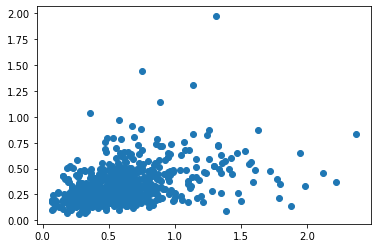

In [249]:
plt.scatter(df['abs_Beta'], newd['abs_Beta'])

Text(0, 0.5, 'distal observed effect')

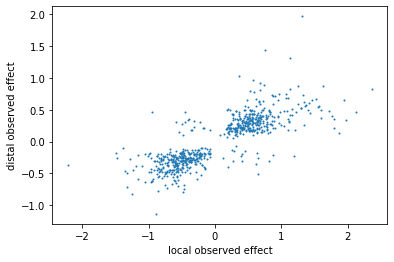

In [250]:
plt.scatter(df['Beta'], newd['Beta'],s=1)
plt.xlabel("local observed effect")
plt.ylabel("distal observed effect")

In [251]:
from scipy.stats import pearsonr
pearsonr(df['abs_Beta'], newd['abs_Beta'])

(0.4008546238537578, 1.0260601619452211e-26)

In [252]:
pearsonr(df['Beta'], newd['Beta'])

(0.8148285317030296, 5.230535437738494e-157)

(0.3703204935701525, 1.0444693438062491e-83)